# Create Multi-layers Fully Connected Neural Networks 


The goals are:
  - Creat your multi-layer fully connected neural network (more than 2 layers).
  - Train and test multi-layer fully connected neural networks on dataset.
  - Try different number of layers fully connected neural networks on the same dataset and compare the performance.
  
      
## Importing Python Libraries

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf


from tensorflow.keras.utils import to_categorical # Function to convert labels to one-hot encoding
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense, Activation,Input 
from tensorflow.keras.optimizers import SGD

import sys
## Adding dataset_utils to the system path so we can import it

MY_UTILS_PATH = 'Modules/'
if not MY_UTILS_PATH in sys.path:
    sys.path.append(MY_UTILS_PATH)
import dataset_utils 


## Loading and Displaying a Synthetic 2D Dataset

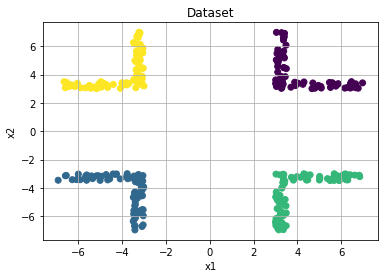

In [6]:
#Generating a synthetic dataset with four classes
nsamples = 300

data = dataset_utils.corners(N = nsamples,scale = 0.5,gapwidth = 3,cornerwidth = 4) # linear dataset
#data = dataset_utils.crescent_full_moon(N = nsamples,r1 = 5,r2 = 10,r3 = 15) #non-linear dataset

# Separating features (X) and labels (Y)
Y = data[:,-1].astype(int) # Labels
X = data[:,:-1] # Features

#Number of classes
k = np.unique(Y).size

colors = np.array(['r','y','b','g'])

#Displaying the dataset
plt.scatter(X[:,0],X[:,1],c=Y)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.title("Dataset")
plt.show()

## Train, Validation and Test Sets Split

In [9]:
# First we will shuffle the samples
indexes = np.arange(X.shape[0]) 
np.random.shuffle(indexes)
X = X[indexes,:]
Y = Y[indexes]

# Then, we split our data into train/val/test sets
#train_split = np.int(0.5*Y.size)
#val_split = np.int(0.75*Y.size)
train_split = int(0.5*Y.size) #148
val_split = int(0.75*Y.size) #222

X_train = X[:train_split,:]
Y_train = Y[:train_split]

X_val = X[train_split:val_split,:]
Y_val = Y[train_split:val_split]

X_test = X[val_split:,:]
Y_test = Y[val_split:]

## Data Normalization

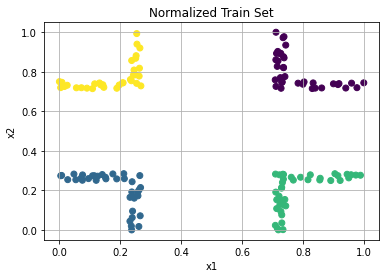

In [10]:
# min-max data normalization
x_train_min = X_train.min(axis = 0, keepdims = True)
x_train_max = X_train.max(axis = 0, keepdims = True)

X_train = (X_train - x_train_min)/(x_train_max - x_train_min)
X_val = (X_val - x_train_min)/(x_train_max - x_train_min)
X_test = (X_test - x_train_min)/(x_train_max - x_train_min)


#####################################################################################
#Activity suggestion:
# Change the min-max normalization above by standardization ((X - mean)/(std))
####################################################################################


#Displaying the normalized train set
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.title("Normalized Train Set")
plt.show()

## Representing Labels using one-hot-ecoding

In [11]:
Y_oh_train = to_categorical(Y_train, k) 
Y_oh_val = to_categorical(Y_val, k) 
Y_oh_test = to_categorical(Y_test, k)
# Displaying the 5 first elemnts
print('Y_train[:5]:')
print(Y_train[:5])
print('\nY_oh_train[:5]=')
print(Y_oh_train[:5])

Y_train[:5]:
[0 1 2 0 0]

Y_oh_train[:5]=
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


## Defining a Fully Connected Neural Network with Keras

In [12]:
def my_model2(k, learning_rate = 0.15):
    inputs = Input(shape=(2,))
    hidden1 = Dense(10, activation='relu')(inputs)
    out1 = Dense(k, activation='softmax')(hidden1)
    model = Model(inputs=inputs, outputs=out1)
    sgd = SGD(lr=learning_rate)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics = ["accuracy"]) 
    return model  

In [13]:
model = my_model2(k)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 4)                 44        
                                                                 
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________
None


E:\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


## Training the Model

In [36]:
batch_size = train_split
nb_epoch = 200
n = X_train.shape[0] # number of training examples
history = model.fit(X_train, Y_oh_train, validation_data=(X_val,Y_oh_val), \
                    batch_size=batch_size, epochs=nb_epoch,verbose=1)

Epoch 1/200
1/1 [==============================] - 0s 475ms/step - loss: 1.5469 - accuracy: 0.2365 - val_loss: 1.4386 - val_accuracy: 0.3243
Epoch 2/200
1/1 [==============================] - 0s 34ms/step - loss: 1.5391 - accuracy: 0.2365 - val_loss: 1.4336 - val_accuracy: 0.3243
Epoch 3/200
1/1 [==============================] - 0s 30ms/step - loss: 1.5316 - accuracy: 0.2365 - val_loss: 1.4290 - val_accuracy: 0.3243
Epoch 4/200
1/1 [==============================] - 0s 32ms/step - loss: 1.5244 - accuracy: 0.2365 - val_loss: 1.4245 - val_accuracy: 0.3243
Epoch 5/200
1/1 [==============================] - 0s 30ms/step - loss: 1.5176 - accuracy: 0.2365 - val_loss: 1.4203 - val_accuracy: 0.3243
Epoch 6/200
1/1 [==============================] - 0s 31ms/step - loss: 1.5110 - accuracy: 0.2365 - val_loss: 1.4163 - val_accuracy: 0.3243
Epoch 7/200
1/1 [==============================] - 0s 30ms/step - loss: 1.5047 - accuracy: 0.2365 - val_loss: 1.4124 - val_accuracy: 0.3243
Epoch 8/200
1/1 [==

1/1 [==============================] - 0s 31ms/step - loss: 1.2849 - accuracy: 0.5000 - val_loss: 1.2809 - val_accuracy: 0.6081
Epoch 118/200
1/1 [==============================] - 0s 29ms/step - loss: 1.2839 - accuracy: 0.5000 - val_loss: 1.2801 - val_accuracy: 0.6081
Epoch 119/200
1/1 [==============================] - 0s 30ms/step - loss: 1.2828 - accuracy: 0.5000 - val_loss: 1.2793 - val_accuracy: 0.6081
Epoch 120/200
1/1 [==============================] - 0s 28ms/step - loss: 1.2818 - accuracy: 0.5068 - val_loss: 1.2785 - val_accuracy: 0.6081
Epoch 121/200
1/1 [==============================] - 0s 28ms/step - loss: 1.2808 - accuracy: 0.5068 - val_loss: 1.2778 - val_accuracy: 0.6081
Epoch 122/200
1/1 [==============================] - 0s 28ms/step - loss: 1.2798 - accuracy: 0.5068 - val_loss: 1.2770 - val_accuracy: 0.6081
Epoch 123/200
1/1 [==============================] - 0s 27ms/step - loss: 1.2789 - accuracy: 0.5135 - val_loss: 1.2762 - val_accuracy: 0.6081
Epoch 124/200
1/1 [=

Epoch 175/200
1/1 [==============================] - 0s 29ms/step - loss: 1.2315 - accuracy: 0.6014 - val_loss: 1.2354 - val_accuracy: 0.6757
Epoch 176/200
1/1 [==============================] - 0s 27ms/step - loss: 1.2307 - accuracy: 0.6149 - val_loss: 1.2346 - val_accuracy: 0.6757
Epoch 177/200
1/1 [==============================] - 0s 29ms/step - loss: 1.2298 - accuracy: 0.6149 - val_loss: 1.2339 - val_accuracy: 0.6757
Epoch 178/200
1/1 [==============================] - 0s 28ms/step - loss: 1.2290 - accuracy: 0.6149 - val_loss: 1.2332 - val_accuracy: 0.6757
Epoch 179/200
1/1 [==============================] - 0s 27ms/step - loss: 1.2282 - accuracy: 0.6149 - val_loss: 1.2324 - val_accuracy: 0.6757
Epoch 180/200
1/1 [==============================] - 0s 28ms/step - loss: 1.2274 - accuracy: 0.6149 - val_loss: 1.2317 - val_accuracy: 0.6757
Epoch 181/200
1/1 [==============================] - 0s 27ms/step - loss: 1.2266 - accuracy: 0.6149 - val_loss: 1.2309 - val_accuracy: 0.6757
Epoch 

## Prininting Loss and estimated weights (Ws)

Final loss (cross-entropy and accuracy): [1.2130365371704102, 0.7162162065505981]

Layer 0
Bias:
 [-0.01905436 -0.04024119 -0.07477564  0.12776074  0.01015133 -0.05308722
 -0.03656068 -0.04140401  0.         -0.0240263 ]
W:
 [[ 0.2305014   0.5563939   0.20239334  0.3779864   0.4182218   0.03312308
   0.46590173  0.14305486 -0.4810341   0.39824417]
 [ 0.1032909   0.39985162  0.66541487 -0.21237211 -0.03668941  0.02719123
  -0.31353694  0.6166669  -0.39620432 -0.35887656]]

Layer 1
Bias:
 [ 0.         -0.00669851 -0.00745234  0.09339268 -0.00770954 -0.03455918
 -0.04957754 -0.0376417  -0.08010427 -0.03018191]
W:
 [[-0.18426329 -0.00289689 -0.3383043   0.36579898 -0.23407753 -0.14616619
   0.54185516 -0.1215139   0.5082581  -0.04132466]
 [-0.03435057  0.17412312 -0.06977576  0.1533941   0.09567687  0.14702116
   0.5145835   0.3541247  -0.01223893  0.11505116]
 [-0.38209277 -0.10682724 -0.29883617 -0.1453265   0.28670844 -0.1957044
   0.40986323  0.3434861   0.33355483 -0.0928925 ]
 [ 0.14

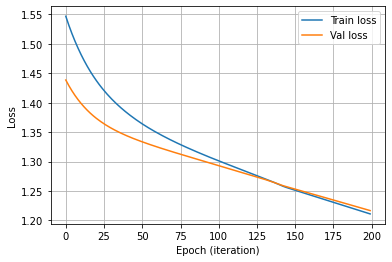

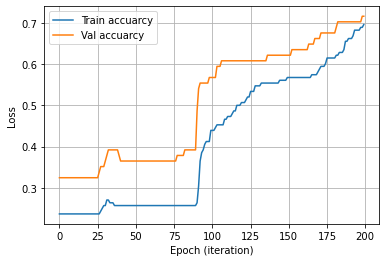

In [37]:
loss = model.evaluate(X_test, Y_oh_test, verbose=0)
print('Final loss (cross-entropy and accuracy):',loss)
print()
W = model.get_weights()
for ii in range(len(W)//2):
    print("Layer %d" %ii)
    print('Bias:\n', W[2*ii + 1])
    print('W:\n', W[2*ii])
    print()

plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.plot(history.history['accuracy'], label = "Train accuarcy")
plt.plot(history.history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

## Testing

In [38]:
predictions = model.predict(X_test[:3])
print(predictions)

predictions_nonvector = model.predict(X_test[:3]).argmax(axis = 1)
print("predicted labels are: ", predictions_nonvector)
print("True labels are: ", Y_test[:3])



1/1 [==============================] - 0s 48ms/step
[[0.25338942 0.29677233 0.2199116  0.22992663]
 [0.25069425 0.21279077 0.2834674  0.25304762]
 [0.26924452 0.28606626 0.2115082  0.23318104]]
1/1 [==============================] - 0s 18ms/step
predicted labels are:  [1 2 1]
True labels are:  [1 2 1]


## Suggested activities
- Repeat the example without normalizing the data or using standardization (i.e., subtract from the mean and divide by the standard-deviation);
- Experiment with other datasets
- Change the neural network architecture
- ...